In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests


Fetching confirmed data for 2017...
Fetching confirmed data for 2018...
Fetching confirmed data for 2019...
Fetching confirmed data for 2020...
Fetching confirmed data for 2021...
Fetching confirmed data for 2022...
Fetching confirmed data for 2023...
Fetching confirmed data for 2024...


/var/folders/g0/jwb5n0vx0psc1nz63rj8jjg00000gn/T/ipykernel_65743/1106804444.py:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jade/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


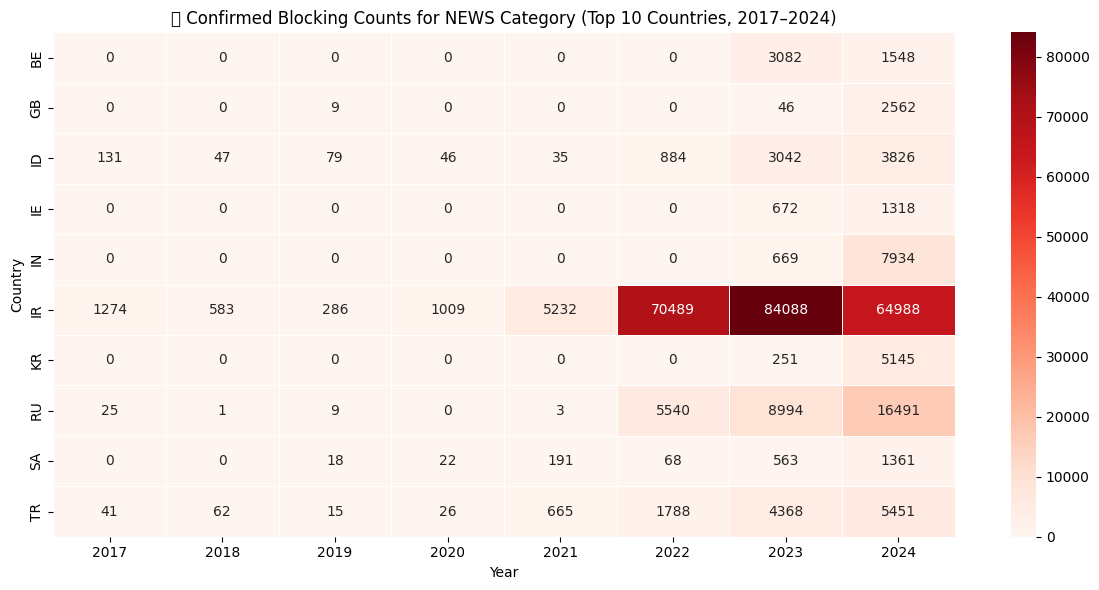

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Step 1: Fetch confirmed data for the NEWS category from 2017–2024
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
confirmed_data = []

for year in years:
    print(f"Fetching confirmed data for {year}...")
    url = "https://api.ooni.io/api/v1/aggregation"
    params = {
        "axis_x": "probe_cc",
        "axis_y": "category_code",
        "test_name": "web_connectivity",
        "since": f"{year}-01-01",
        "until": f"{year}-12-31",
        "category_code": "NEWS"
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        for row in response.json().get("result", []):
            confirmed_data.append({
                "year": year,
                "country": row["probe_cc"],
                "confirmed_count": row.get("confirmed_count", 0)
            })

# Step 2: Create DataFrame
df_confirmed = pd.DataFrame(confirmed_data)

# Step 3: Aggregate total confirmed count per country across all years
top_countries_confirmed = (
    df_confirmed.groupby("country")["confirmed_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Step 4: Filter DataFrame to include only top countries
df_top_confirmed = df_confirmed[df_confirmed["country"].isin(top_countries_confirmed)]

# Step 5: Pivot data for heatmap
heatmap_data_confirmed = df_top_confirmed.pivot(index="country", columns="year", values="confirmed_count").fillna(0)

# Step 6: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_confirmed, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5)
plt.title("📊 Confirmed Blocking Counts for NEWS Category (Top 10 Countries, 2017–2024)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
